In [1]:
#!pip install uv
#!pip install autogluon.timeseries


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: C:\Users\nilsw\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import yfinance as yf

C:\Users\nilsw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
file_path = 'data\EURUSD_15_window.csv'
df = pd.read_csv(file_path)
df.tail()

,item_id,Close,Datetime,ID
47680,EURUSD,1.0787,2024-03-29 16:30:00,164
47681,EURUSD,1.0787,2024-03-29 16:45:00,164
47682,EURUSD,1.0788,2024-03-29 17:00:00,164
47683,EURUSD,1.0788,2024-03-29 17:15:00,164
47684,EURUSD,1.0788,2024-03-29 17:30:00,164


In [18]:
count_id_0 = (df['ID'] == 1).sum()

print(f"Anzahl der Zeilen mit ID 0: {count_id_0}")

Anzahl der Zeilen mit ID 0: 289


In [19]:
prediction_length = 96

In [6]:
#train = df[(df['Datetime'] <= '2024-05-29 23:45:00')]

In [7]:
#test = df[(df['Datetime'] >= '2024-05-29 00:00:00') & (df['Datetime'] <= '2024-05-31 00:00:00')]

In [8]:
#print(test)

      item_id   Close             Datetime
27555  EURUSD  1.0850  2024-05-29 00:00:00
27556  EURUSD  1.0851  2024-05-29 00:15:00
27557  EURUSD  1.0848  2024-05-29 00:30:00
27558  EURUSD  1.0847  2024-05-29 00:45:00
27559  EURUSD  1.0845  2024-05-29 01:00:00
...       ...     ...                  ...
27741  EURUSD  1.0830  2024-05-30 22:45:00
27742  EURUSD  1.0830  2024-05-30 23:00:00
27743  EURUSD  1.0829  2024-05-30 23:15:00
27744  EURUSD  1.0829  2024-05-30 23:30:00
27745  EURUSD  1.0819  2024-05-31 00:00:00

[191 rows x 3 columns]


In [9]:
#df =  df[(df['Datetime'] <= '2024-05-31 00:00:00')]

In [20]:
data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="ID",
    timestamp_column="Datetime"
)
data.head()

Renaming existing column 'item_id' -> '__item_id' to avoid name collisions.


__item_id   Close
item_id timestamp                            
0       2023-10-30 00:00:00    EURUSD  1.0561
        2023-10-30 00:15:00    EURUSD  1.0561
        2023-10-30 00:30:00    EURUSD  1.0559
        2023-10-30 00:45:00    EURUSD  1.0560
        2023-10-30 01:00:00    EURUSD  1.0562

In [21]:
train_data , test_data = data.train_test_split(prediction_length)

In [22]:
predictor1 = TimeSeriesPredictor(
    prediction_length=96,
    freq="15min",
    path="autogluon-model_medium",
    target="Close",
    eval_metric="SQL",
)

predictor1.fit(
    train_data,
    presets="medium_quality",
    time_limit=800,
)

Frequency '15min' stored as '15T'
Beginning AutoGluon training... Time limit = 800s
AutoGluon will save models to 'autogluon-model_medium'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
GPU Count:          0
Memory Avail:       3.34 GB / 15.72 GB (21.2%)
Disk Space Avail:   688.21 GB / 953.01 GB (72.2%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': SQL,
 'freq': '15T',
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 96,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Close',
 'time_limit': 800,
 'verbosity': 2}

Provided train_data has 31845 rows, 165 time series. Median time ser

In [24]:
predictions = predictor1.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                               
0       2023-11-01 00:15:00  1.058014  1.056481  1.057249  1.057262  1.057764   
        2023-11-01 00:30:00  1.058011  1.056246  1.057117  1.057165  1.057702   
        2023-11-01 00:45:00  1.058017  1.056056  1.056991  1.057078  1.057666   
        2023-11-01 01:00:00  1.057985  1.055918  1.056896  1.057049  1.057597   
        2023-11-01 01:15:00  1.057996  1.055821  1.056827  1.056994  1.057602   

                                  0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                              
0       2023-11-01 00:15:00  1.058019  1.058049  1.058555  1.058729  1.059535  
        2023-11-01 00:30:00  1.058002  1.058072  1.058617  1.058847  1.059732  
        2023-11-01 00:45:00  1.058010  1.058106  1.058697  1.058960  1.059899  
        2023-11-01 01:00:00  1.057957  1.058102  1.058727  1.059002  1.059988  
        2023-11-01 01:15:00  1.057978  1.058143  1.058795  1.059112  1.060151

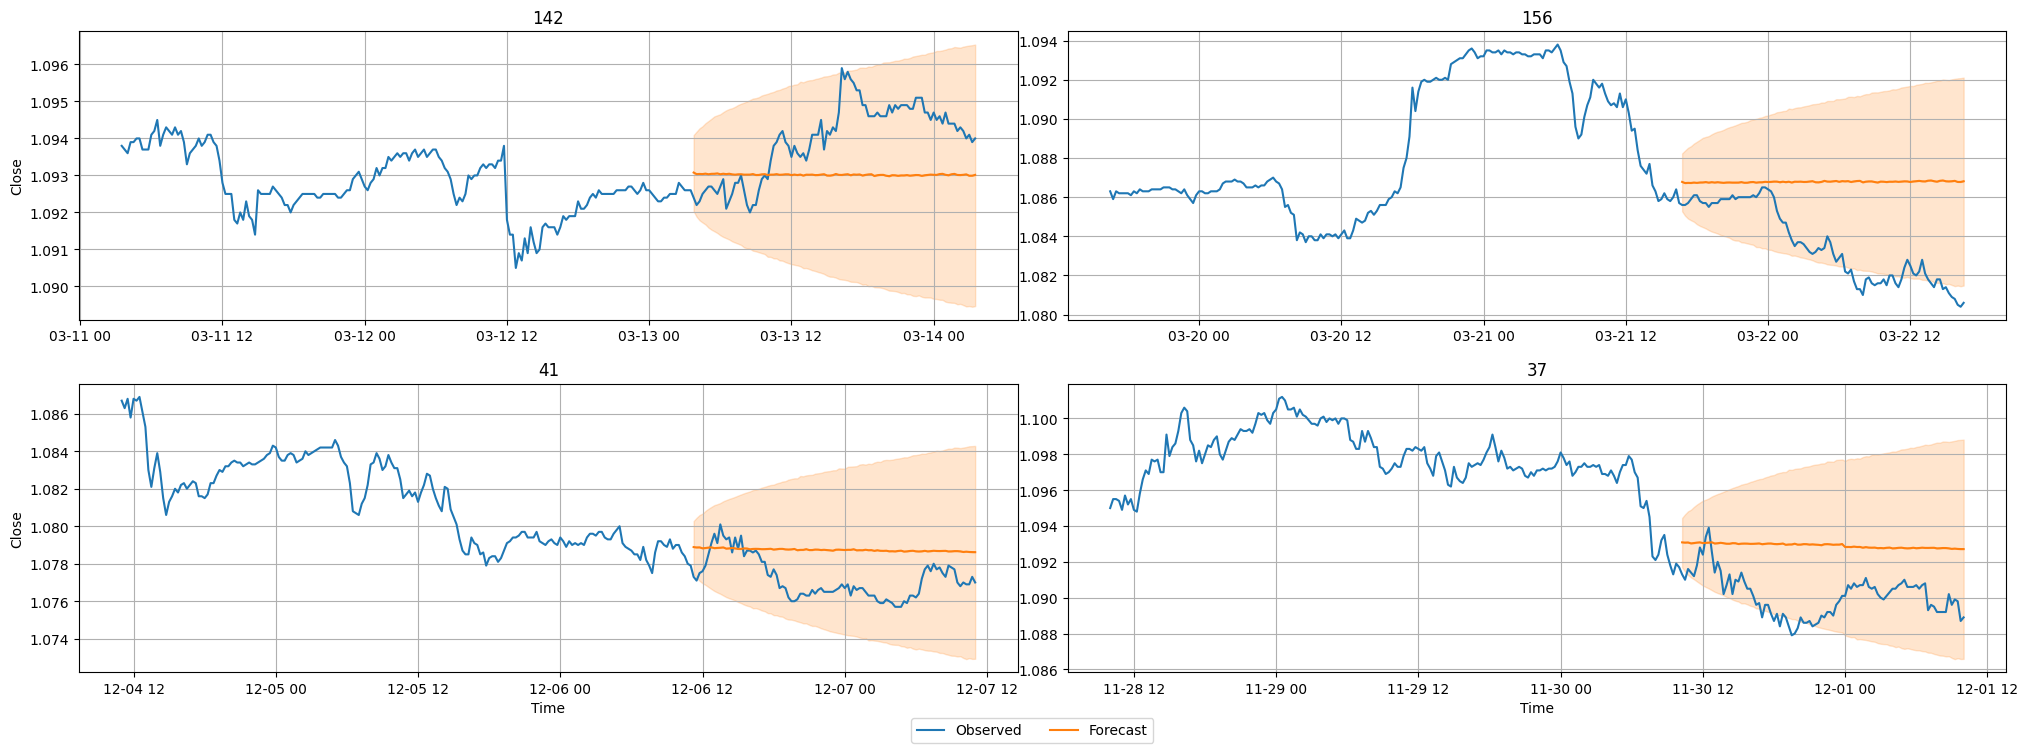

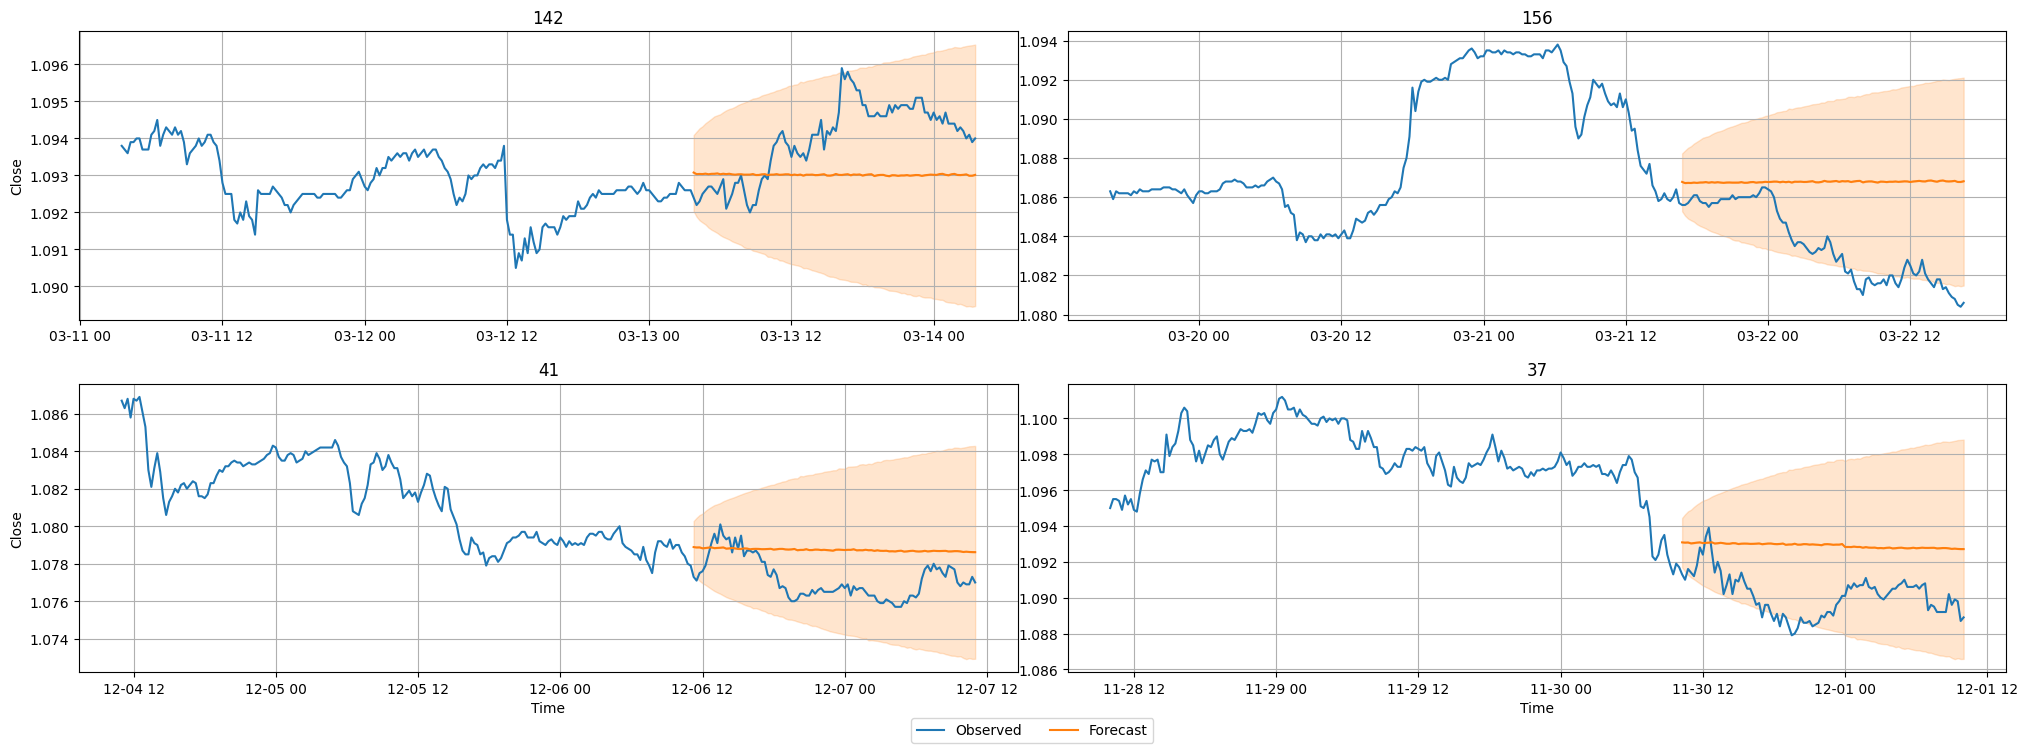

In [26]:
predictor1.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=400, max_num_item_ids=4)


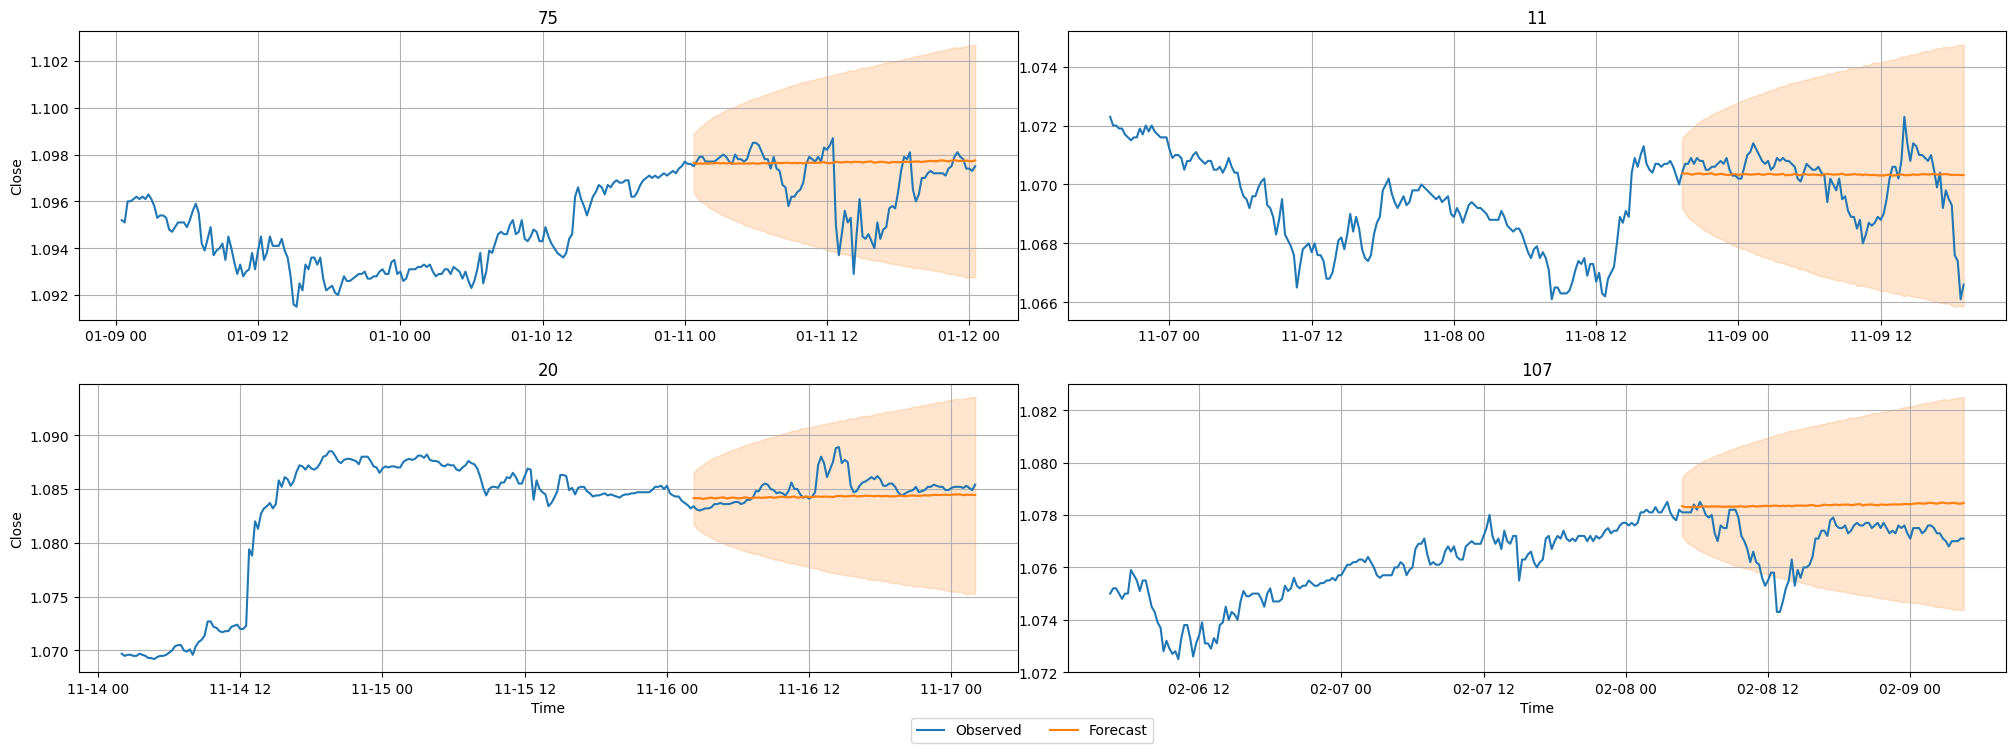

In [27]:
# Plot 4 randomly chosen time series and the respective forecasts
predictor1.plot(data, predictions, quantile_levels=[0.1, 0.9], max_history_length=300, max_num_item_ids=4)

In [28]:
predictor2 = TimeSeriesPredictor(
    prediction_length=96,
    freq="15min",
    path="autogluon-model_high",
    target="Close",
    eval_metric="SQL",
)

predictor2.fit(
    train_data,
    presets="high_quality",
    time_limit=2400,
)

Frequency '15min' stored as '15T'
Beginning AutoGluon training... Time limit = 2400s
AutoGluon will save models to 'autogluon-model_high'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
GPU Count:          0
Memory Avail:       3.55 GB / 15.72 GB (22.6%)
Disk Space Avail:   685.09 GB / 953.01 GB (71.9%)
Setting presets to: high_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': SQL,
 'freq': '15T',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 96,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Close',
 'time_limit': 2400,
 'verbosity': 2}

Provided train_data has 31845 rows, 165 time series. Median time ser

In [32]:
predictions2 = predictor2.predict(train_data)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


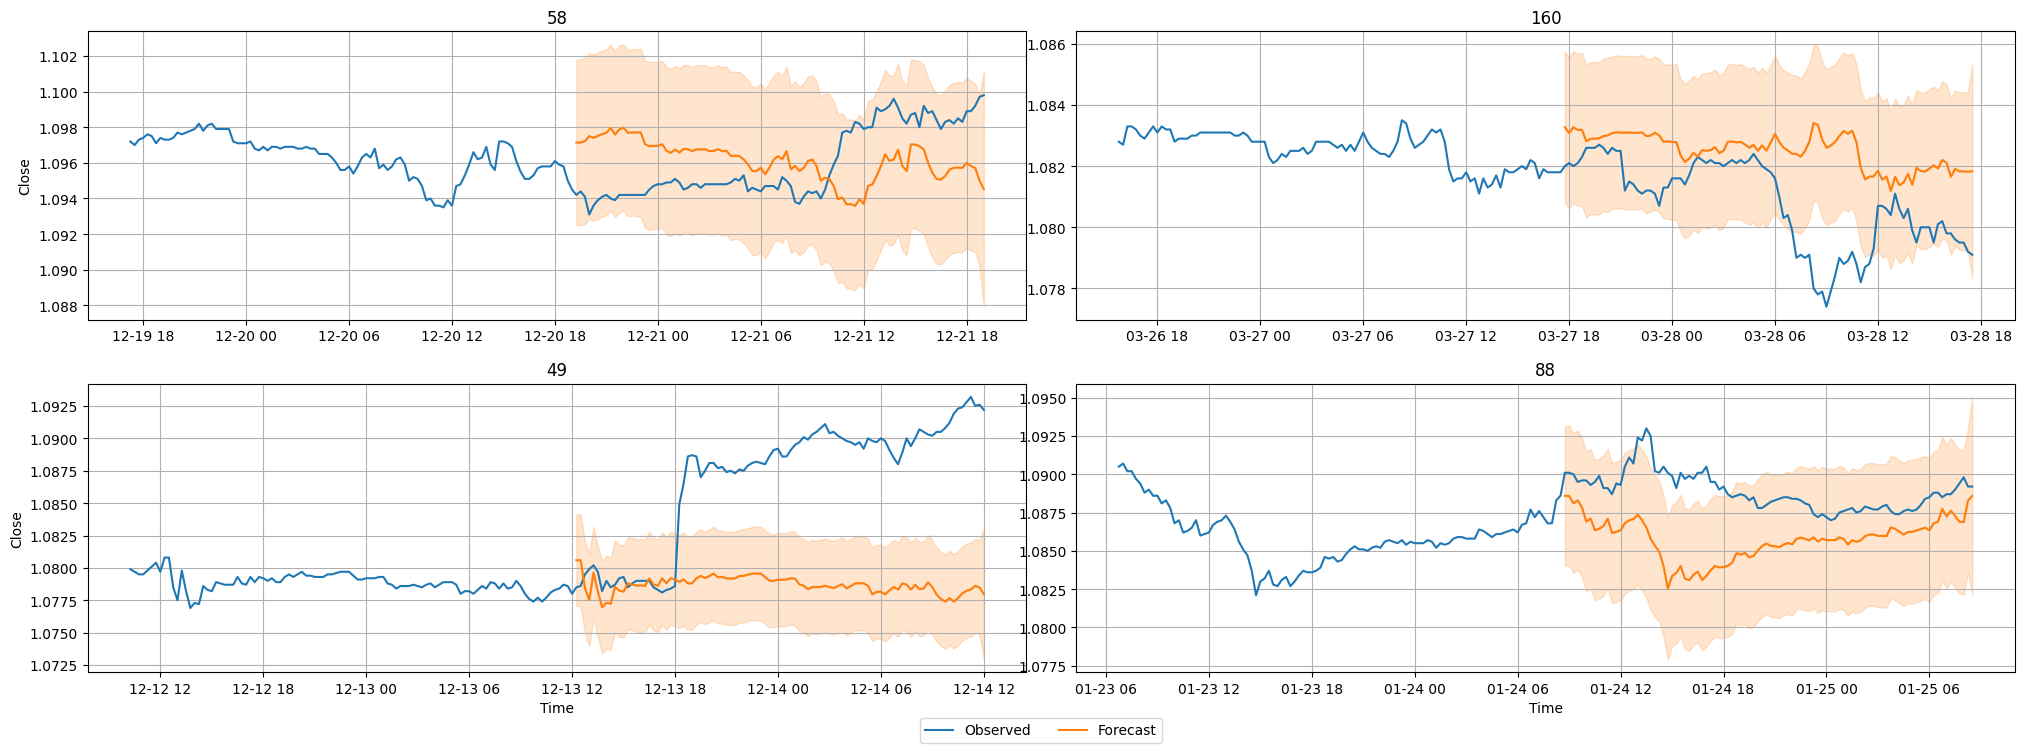

In [36]:
predictor2.plot(test_data, predictions2, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)

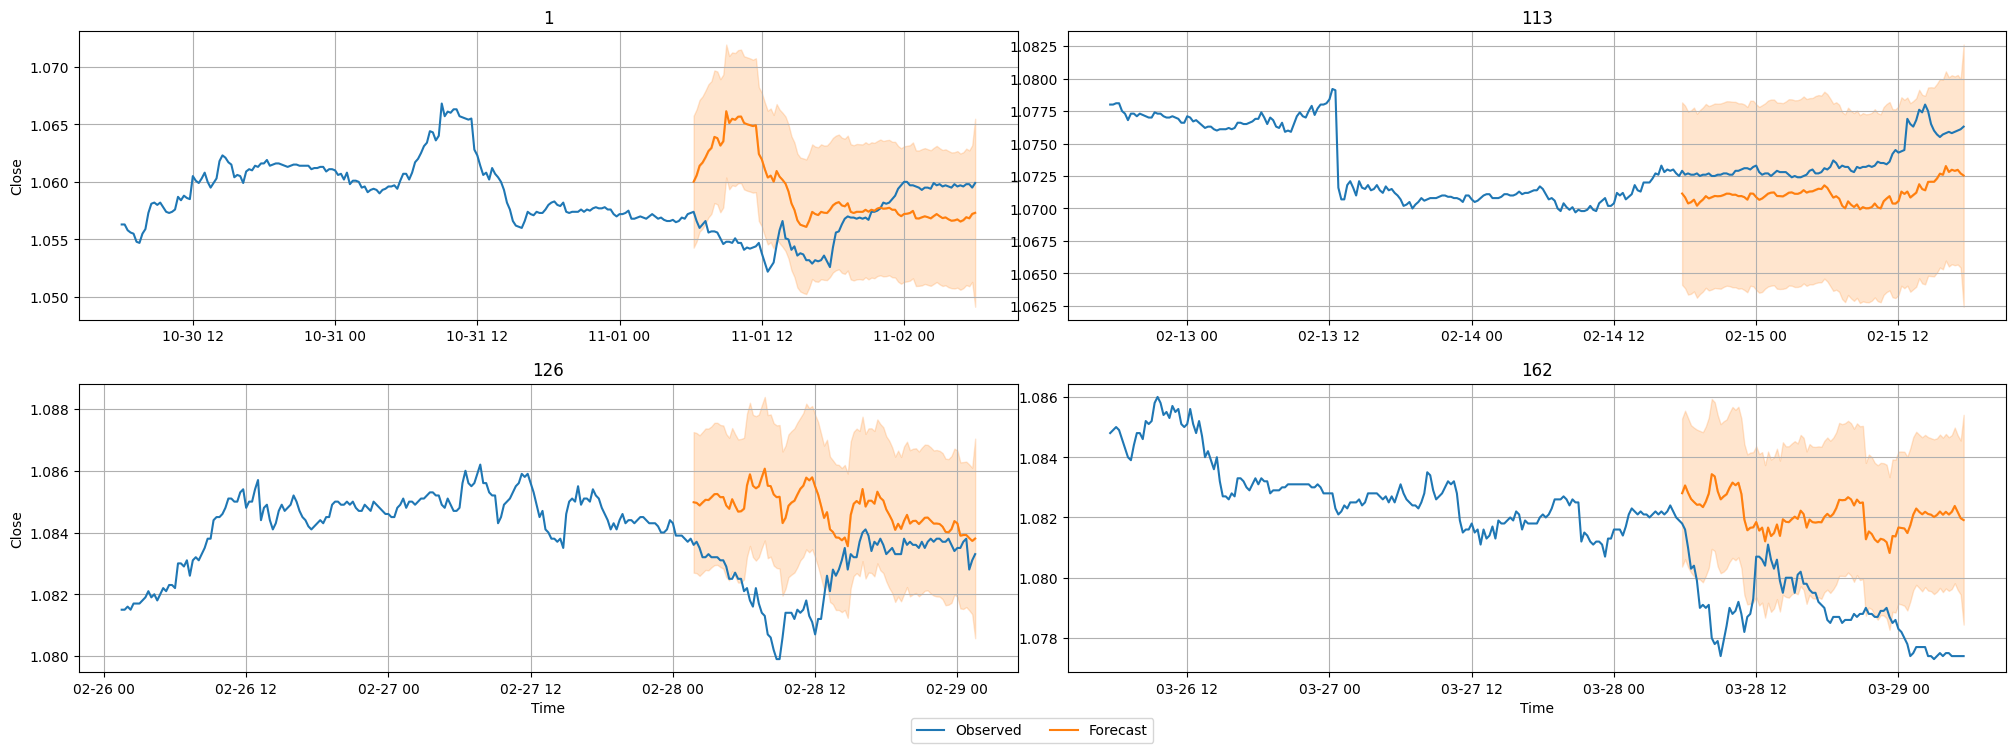

In [71]:
predictor2.plot(data, predictions2, quantile_levels=[0.1, 0.9], max_history_length=350, max_num_item_ids=4)

In [37]:
predictor2.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,AutoETS,-0.871127,-1.981468,35.723793,18.569546,0.040772,7
1,DynamicOptimizedTheta,-0.892631,-2.073290,43.551454,30.026775,0.032020,6
2,TemporalFusionTransformer,-1.028134,-2.228520,0.870684,0.604265,458.617327,9
3,RecursiveTabular,-1.067636,-2.339857,58.964258,72.322615,191.396041,2
4,NPTS,-1.085193,-2.431418,6.813878,3.039551,0.032066,5
5,WeightedEnsemble,-1.091932,-1.949977,114.963954,108.937268,5.994913,12
6,DirectTabular,-1.120358,-2.388815,0.761961,0.529892,7.527457,3
7,SeasonalNaive,-1.122997,-1.950625,5.046060,5.663494,0.037675,1
8,DeepAR,-1.204833,-2.676544,14.340170,11.777348,472.870230,10
9,AutoARIMA,-1.351005,-2.234008,51.646704,23.258504,0.035642,8


In [38]:
predictions3 = predictor2.predict(train_data, model="AutoETS")

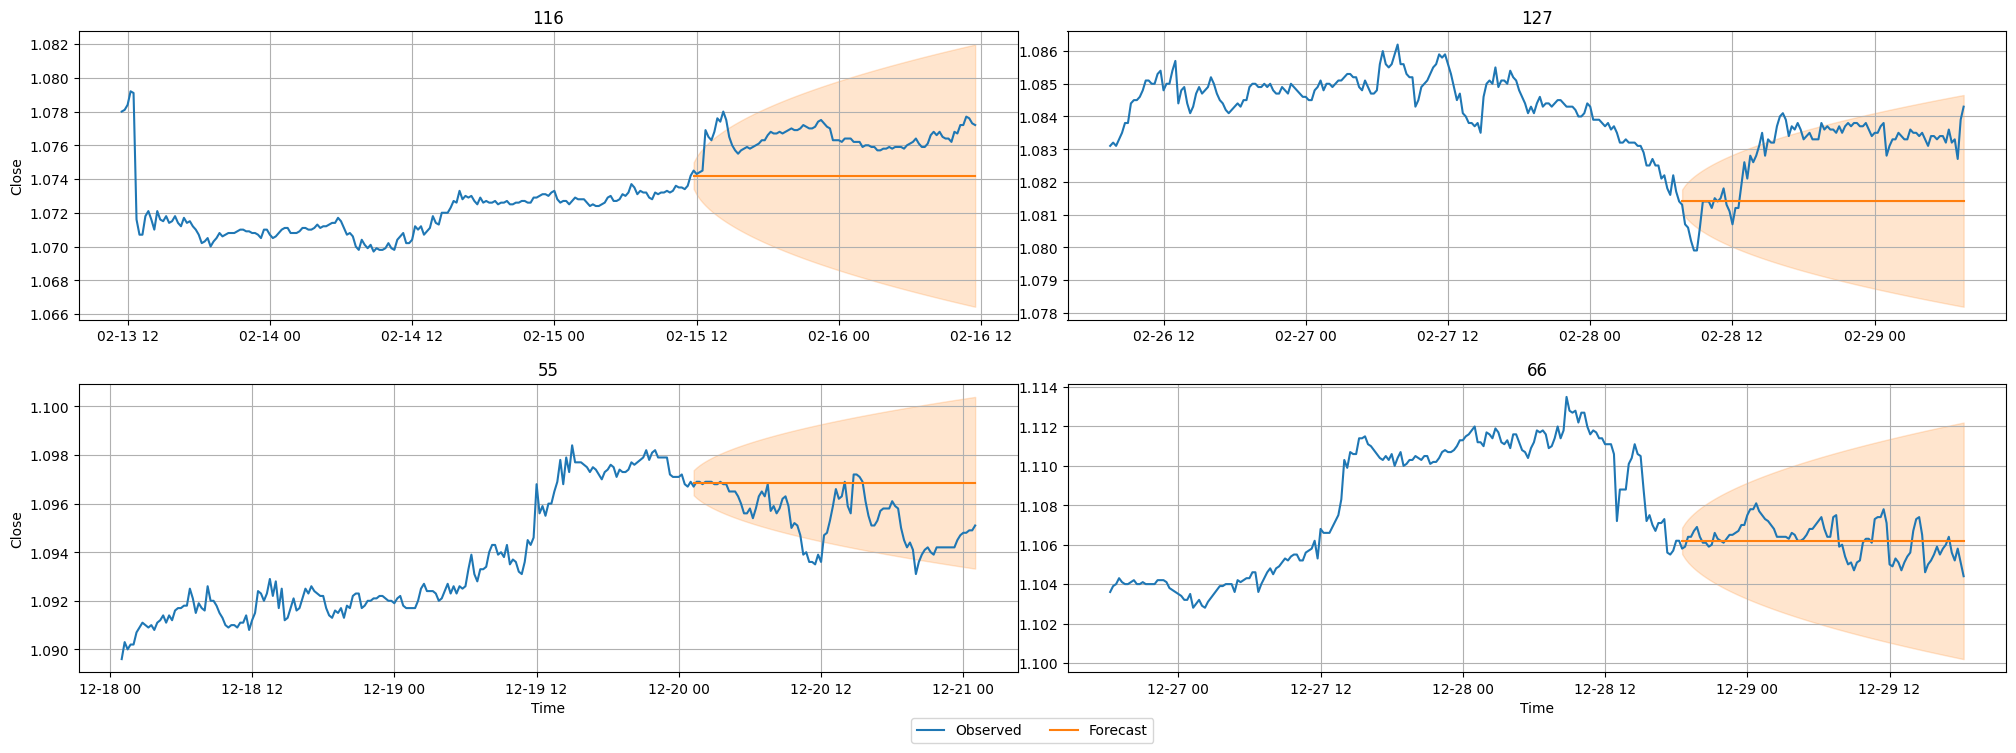

In [72]:
predictor2.plot(data, predictions3, quantile_levels=[0.1, 0.9], max_history_length=400, max_num_item_ids=4)

In [22]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()

In [23]:
if cuda_available:
    # Get the number of GPUs available
    num_gpus = torch.cuda.device_count()
    print(f"CUDA is available with {num_gpus} GPU(s)!")
else:
    print("CUDA is not available.")

CUDA is not available.


In [24]:
import tensorflow as tf

# Check if CUDA is available
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("CUDA is available!")
else:
    print("CUDA is not available.")

CUDA is not available.


In [25]:
predictor = TimeSeriesPredictor(
    prediction_length=96,
    freq="15min",
    path="autogluon-model_chronos",
    target="Close",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="best_quality",
    time_limit=800,
)

Frequency '15min' stored as '15T'
Beginning AutoGluon training... Time limit = 800s
AutoGluon will save models to 'autogluon-model_chronos'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
GPU Count:          0
Memory Avail:       2.74 GB / 15.72 GB (17.4%)
Disk Space Avail:   687.62 GB / 953.01 GB (72.2%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': '15T',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 96,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Close',
 'time_limit': 800,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency '

In [ ]:
predictions = predictor.predict(train_data)

data with frequency 'None' has been resampled to frequency '15T'.
Model not specified in predict, will default to the model with the best validation score: Chronos[mini]


data with frequency 'None' has been resampled to frequency '15T'.


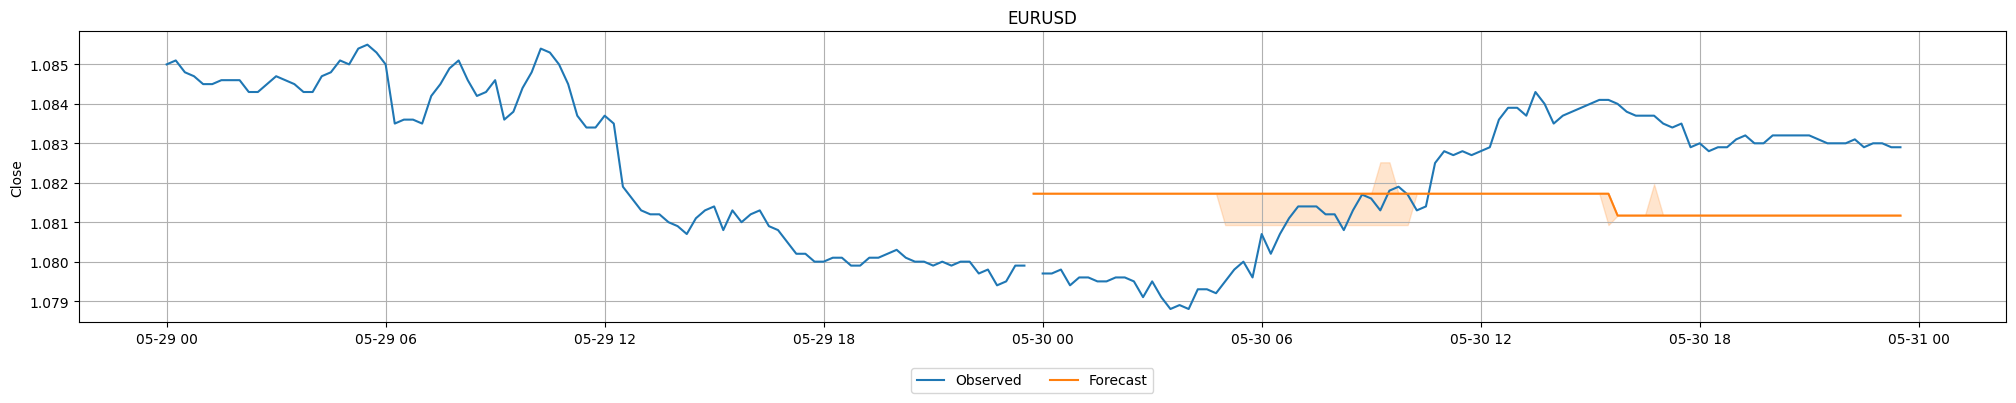

In [ ]:
predictor.plot(test_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)